# Physics 611 - Homework 0c

## Tucker Knaak - Department of Physics, Creighton University - Fall 2022

### Problem 2. Overdamped harmonic oscillators.

#### Suppose that an overdamped harmonic oscillator (with damping parameter $\lambda$) is subjected to the following forcing function $$F(t)=F_0(1+\omega t), -\frac{\pi}{\omega}<t<\frac{\pi}{\omega},$$ where $F_0$ has units of force.

#### (a) Find the Fourier series representation of $F(t)$ and plot the first ten terms of the Fourier series to convince yourself your Fourier series is an accurate representation of the above waveform.

### Problem 3. Non-linear vs harmonic oscillators.

#### A mass $m$ is confined to the $x$-axis by a conservative force which is derivable from a potential energy function ($k$ and $\epsilon$ are positive constants) given by $$U(x)=\frac{1}{2}kx^2-\frac{1}{4}\epsilon x^4.$$  Assume a total mechanical energy $E$.

#### (f) Suppose the term $-(1/4)\epsilon x^4$ in the potential is much smaller than $(1/2)kx^2$, so that the mass is almost a harmonic oscillator.  With the initial conditions at time $t=0$, the mass is at rest at $x=A$, use the method of successive approximations to find an approximate solution $x(t)$, to the non-linear equation obtained in part e).

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

#### 2 (a) Find the Fourier series representation of $F(t)$ and plot the first ten terms of the Fourier series to convince yourself your Fourier series is an accurate representation of the above waveform.

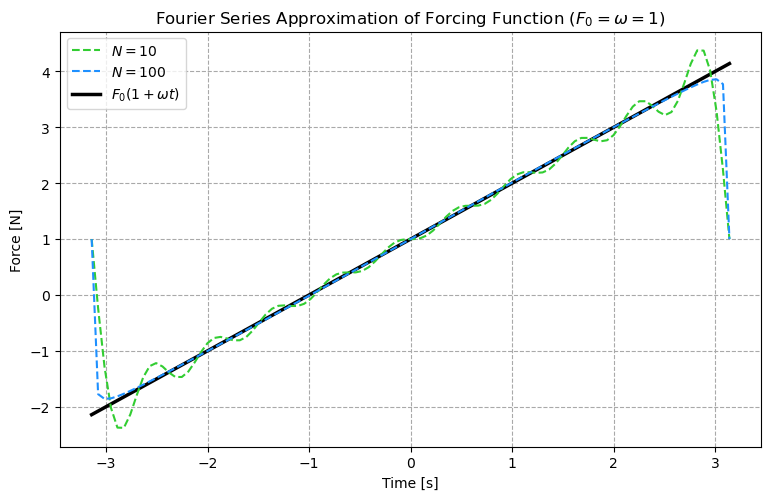

In [2]:
'''Constants'''
F0 = 1  #applied constant force [N]
w = 1   #angular frequency [rad / s]

'''Number of terms in Fourier series'''
N1 = 10
N2 = 100

'''Time interval'''
t_points = np.linspace(-np.pi / w, np.pi / w, 100, endpoint = True)

'''Function to calculate the Fourier coefficient for each term'''
def fourier(n):
    coeff = 2 * F0 * (-1)**(n + 1) / n
    return coeff

'''Calculate forces'''
forcing = [F0 * (1 + w * t) for t in t_points]
fourier1 = []
fourier2 = []
for t in t_points:
    coeff1 = 0
    coeff2 = 0
    coeff3 = 0
    for n1 in range(1, N1 + 1):
        coeff1 += (fourier(n1) * np.sin(n1 * w * t))
    for n2 in range(1, N2 + 1):
        coeff2 += (fourier(n2) * np.sin(n2 * w * t))
    fourier1.append(1 + coeff1)
    fourier2.append(1 + coeff2)
    
'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad  =  2.0)
ax.plot(t_points, fourier1, linestyle = 'dashed', color = 'limegreen', label = f'$N = {N1}$', zorder = 3)
ax.plot(t_points, fourier2, linestyle = 'dashed', color = 'dodgerblue', label = f'$N = {N2}$', zorder = 3)
ax.plot(t_points, forcing, linestyle = 'solid', linewidth = 2.5, color = 'black', label = '$F_0(1+\omega t)$')
ax.grid(True, linestyle = 'dashed', color = 'darkgray')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Force [N]')
ax.set_title('Fourier Series Approximation of Forcing Function $(F_0 = \omega = 1)$')
ax.legend(prop = {'size': 10}, loc = 'upper left', ncol = 1)
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY611_HW0c2a_Plot.png', bbox_inches = 'tight')

#### 3 (f) Suppose the term $-(1/4)\epsilon x^4$ in the potential is much smaller than $(1/2)kx^2$, so that the mass is almost a harmonic oscillator.  With the initial conditions at time $t=0$, the mass is at rest at $x=A$, use the method of successive approximations to find an approximate solution $x(t)$, to the non-linear equation obtained in part e).

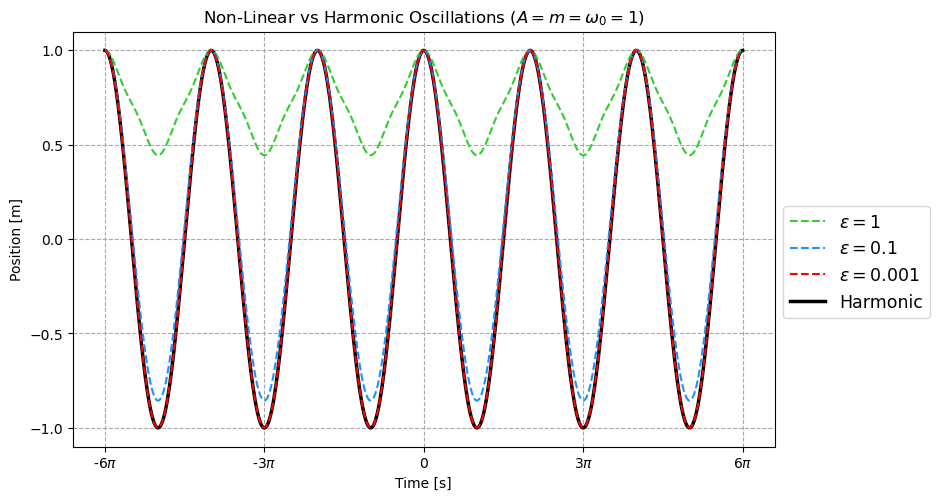

In [3]:
'''Constants'''
A = 1   #initial position x(0) = A [m]
m = 1   #mass [kg]
w0 = 1  #angular frequency [rad / s]

'''Epsilon terms approaching harmonic as e = 0'''
e1 = 1
e2 = 0.1
e3 = 0.001

'''Time interval'''
t_points = np.linspace(-6 * np.pi, 6 * np.pi, 1000, endpoint = True)

'''Function to calculate the position of the non-linear oscillator found in part e)'''
def non_linear(e, t):
    pos = ((A - (3 * e * A**3 / 4 * m * w0**2)) * np.cos(w0 * t) +
          (e * A**3 / 36 * m * w0**2) * np.cos(3 * w0 * t) + 
          (13 * e * A**3 / 18 * m * w0**2))
    return pos

'''Calculate positions'''
nonlinear1 = [non_linear(e1, t) for t in t_points]
nonlinear2 = [non_linear(e2, t) for t in t_points]
nonlinear3 = [non_linear(e3, t) for t in t_points]
harmonic = [A * np.cos(w0 * t) for t in t_points]

'''Create figure and plot results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.tight_layout(pad  =  2.0)
ax.plot(t_points, nonlinear1, linestyle = 'dashed', color = 'limegreen', label = f'$\epsilon = {e1}$', zorder = 3)
ax.plot(t_points, nonlinear2, linestyle = 'dashed', color = 'dodgerblue', label = f'$\epsilon = {e2}$', zorder = 3)
ax.plot(t_points, nonlinear3, linestyle = 'dashed', color = 'red', label = f'$\epsilon = {e3}$', zorder = 3)
ax.plot(t_points, harmonic, linestyle = 'solid', linewidth = 2.5, color = 'black', label = 'Harmonic')
ax.grid(True, linestyle = 'dashed', color = 'darkgray')
ax.set_xticks([-6 * np.pi, -3 * np.pi, 0,3 * np.pi, 6 * np.pi], ['-6$\pi$','-3$\pi$','0','3$\pi$','6$\pi$'])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.set_title('Non-Linear vs Harmonic Oscillations $(A = m = \omega_0 = 1)$')
ax.legend(prop = {'size':12.5}, bbox_to_anchor = (1, 0.6), loc = 'upper left', ncol = 1)
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY611_HW0c3f_Plot.png', bbox_inches = 'tight')